Notebook done by:
- Name: Yashveer Singh
- email: yashveerm8@yahoo.com
- contact: 072 217 9781
- role: Senior Data Scientist

# Data Science End-to-End Notebook

## Outline
Click on the link to be taken to the relevant section

- [1. Exploratory Data Analysis](#1)
    - [1.1. Measuring Data Skewness](#1.1)
    - [1.2. Normalizing & Standardizing Data](#1.2)
    - [1.3. Imputing Missing Values](#1.3)
    - [1.4. Feature Generation](#1.4)
- [2. Modelling from Explored Data](#2)
    - [2.1. Build the Model](#2.1)
    - [2.2. Ensemble Modelling](#2.2)
    - [2.3. Hyperparameter Tuning](#2.3)
    - [2.4. Feature Importance using SHAP](#2.4)
    - [2.5. Pipelining](#2.5)
- [3. Conclusion](#3)

## Overview of this Notebook

- For the Explore AI challenge I have decided to create a Notebook that covers various Data Science techniques used in practice. You will not find a notebook that covers all of these techniques, not even in **Kaggle Kernels!**
- In this notebook I intend to give a complete overview of Data Science Methodologies that I have acquired through my many years of experience being a Data Scientist.
- I will be using multiple datasets in this notebook to explain various concepts, since one dataset may not be enough to cover all the different concepts that I intend to cover.

$$\textbf{
NB: There is a lot of content that I will cover in this notebook. Due to the short space of time, not all concepts may go into 
detail,}$$
$$\textbf{however I will provide addtional links for further explanation.}$$

<a name='1'></a>
## 1. Exploratory Data Analysis

- The purpose of Exploratory Data Analysis is to gain insight into our dataset
- In Exploratory Data Analysis we:
    1. Examine the Distribution of our Data.
    2. Try to find new insights to our Data that will lead to better feature generation.
    3. This new feature generation will lead us to build a model with a higher performance score.
    4. Remember that Data Science is not about creating fancy plots of Data and fitting data to a model, but rather to gain insight from data that will lead to new features and increase overall model performance. 

<a name='1.1'></a>
### 1.1 Measuring Data Skewness
- This is the first method in the data processing step
- Skewness of data refers to data that has a different mean, mode and median. When all of these values differ we say that our data is skew.
- The reasons for removing skewness in data is so that when we feed our data into our model, this will prevent inaccuracies in our models performance due to the presence of skewness in our data. By removing this skewness we are ensuring that the presence of outliers in the data are tremendously reduced.
- Further reading material on data skewness can be found here [Top 3 Methods for Handling Skew Data](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)
- For this example, we will use a medical dataset with medical attributes

#### Load Data

First load the dataset which will be used for training and testing the model built in the modelling section.

In [ ]:
!git clone https://github.com/maxbrent/ExploreAIChallenge.git

Cloning into 'ExploreAIChallenge'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 59 (delta 19), reused 34 (delta 8), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [ ]:
!pip install shap
!pip install lifelines

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394115 sha256=88c2136f5652d41e1546c630bda1f28a6a7193eceb2b9a12db43c9649edd85b4
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap
     |████████████████████████████████| 348kB 2.6MB/s 


In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
print(os.listdir("/content/ExploreAIChallenge"))

['Explore AI Challenge.ipynb', 'README.md', 'utils.py', '.git', 'util.py', 'images', 'data']


In [ ]:
sys.path.insert(0, '/content/ExploreAIChallenge/')

In [ ]:
from utils import load_data

X = pd.read_csv('/content/ExploreAIChallenge/data/X_data.csv',index_col=0)
y_df = pd.read_csv('/content/ExploreAIChallenge/data/y_data.csv',index_col=0)
y = y_df['y']

`X` and `y` are Pandas DataFrames that hold the data for 6,000 diabetic patients. 

#### View the Dataset

The features (`X`) include the following fields:
* Age: (years)
* Systolic_BP: Systolic blood pressure (mmHg)
* Diastolic_BP: Diastolic blood pressure (mmHg)
* Cholesterol: (mg/DL) 

In [ ]:
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


The target (`y`) is an indicator of whether or not the patient developed retinopathy.

* y = 1 : patient has retinopathy.
* y = 0 : patient does not have retinopathy.

In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: y, dtype: float64

Before building the model, let's take a closer look at the distribution of the training data. To do this, split the data into train and test sets using a 75/25 split which is recommended practice.

For this, let's use the built in function provided by sklearn library.  See the documentation for [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

Plot the histograms of each column of `X_train` below: 

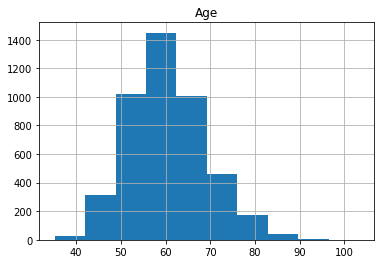

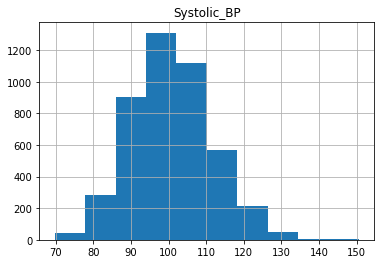

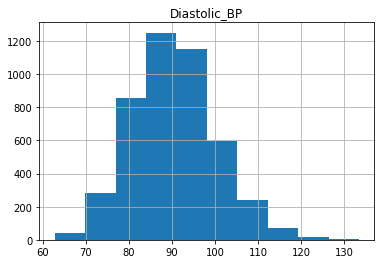

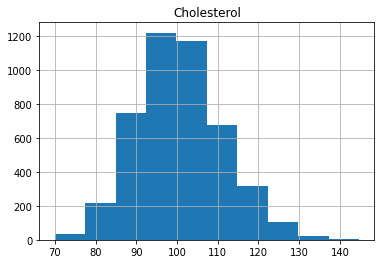

In [ ]:
for col in X.columns:
    X_train_raw.loc[:, col].hist()
    plt.title(col)
    plt.show()

From the distributions above can see, the distributions have a generally bell shaped distribution, but with slight rightward skew.

Many statistical models assume that the data is normally distributed, forming a symmetric Gaussian bell shape (with no skew) more like the distribution shown below.

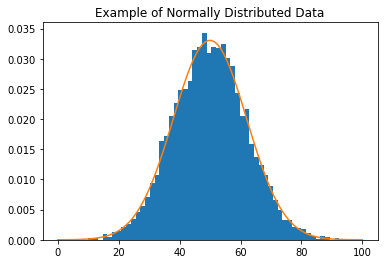

In [ ]:
from scipy.stats import norm
data = np.random.normal(50,12, 5000)
fitting_params = norm.fit(data)
norm_dist_fitted = norm(*fitting_params)
t = np.linspace(0,100, 100)
plt.hist(data, bins=60, density=True)
plt.plot(t, norm_dist_fitted.pdf(t))
plt.title('Example of Normally Distributed Data')
plt.show()

Let's transform this data to be closer to a normal distribution by removing the skewness. One way to remove the skew is by applying the log function to the data.

Let's plot the log of the feature variables to see that it produces the desired effect.

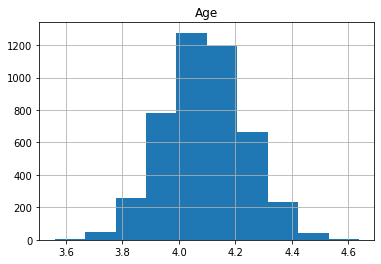

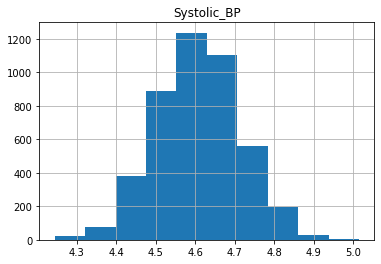

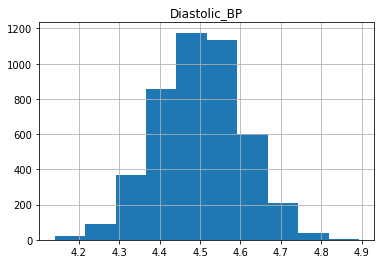

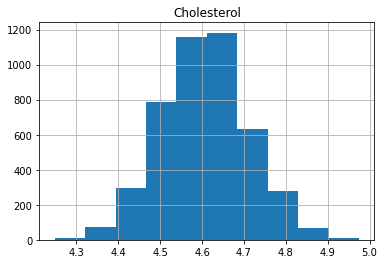

In [ ]:
for col in X_train_raw.columns:
    np.log(X_train_raw.loc[:, col]).hist()
    plt.title(col)
    plt.show()

From the above the data is more symmetric after taking the log and is closer to normally distributed data.

<a name='1.2'></a>
### 1.2 Normalizing & Standardizing Data
- The second method in the Data Processing step is Normalizing/Standardizing data
<br>
<br>
- $\textbf{Normalizing}$ data is the process of bringing our values winthin a range of 0 - 1 and no assumptions have been made about the data
    - The reason for why you would want to normalize your features is if each of your feature values have various scaling length, e.g. feature 1: 0 - 100 in increments of 1, feature 2: 0 - 1 in increments of 0.01, feature 3: 0 - 100 000 in increments of 1000.
    - As you can see each feature from features 1 to features 3 have different scaling values
    - It is thus important to bring all of our features to one scale length before feeding it into the model preventing inaccurate model results.
    -Normalizing is good for outliers since it brings all of our values closer together.
<br>
<br>
- $\textbf{Standardizing}$ assumes that your data has a Gaussain(bell curve) distribution. This does not strictly have to be true.
    - $$\overline{x} = \frac{x - mean(x)}{std(x)}$$
    - The formula above is used to standardize data:
        - x represents our data value
        - mean(x) represents the mean value for the each feature
    - Standardizing data is sensitive to outliers, therefore outliers will have to be manually removed before applying standardization
- Further information on Normalization and Standardization techniques can be found [How, When, and Why should you Normalize, Standardize, Rescale Your Data](https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

What happens if we do not Standardize/Normalize our data ? If you look at the image below, when we do not normalize or standardize our data, we are in turn optimizing for an objective fuction that looks like the image on the left shown below. We are therefore not optimizing our model to converge to a global minimum.

It is thus important to standardize/normalize our data in order for our models objective fuction to converge to a global minimum shown in the image on the right.

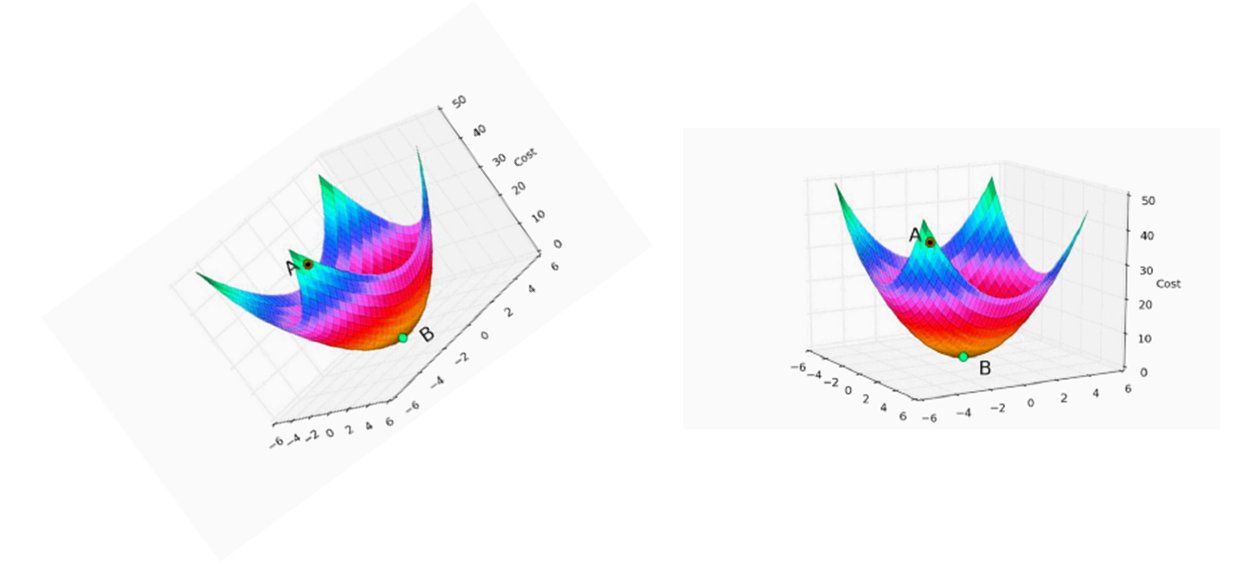

In [ ]:
Image('/content/ExploreAIChallenge/images/optimization.PNG')

#### Mean-Normalize the Data

Let's now transform our data so that the distributions are closer to standard normal distributions.

First let's remove some of the skewness from the distribution by using the log transformation.
Then we will "standardize" the distribution so that it has a mean of zero and standard deviation of 1. Recall that a standard normal distribution has a mean of zero and standard deviation of 1. 

In [ ]:
def make_standard_normal(df_train, df_test):
    """
    In order to make the data closer to a normal distribution, take log
    transforms to reduce the skew.
    Then standardize the distribution with a mean of zero and standard deviation of 1. 
  
    Args:
      df_train (dataframe): unnormalized training data.
      df_test (dataframe): unnormalized test data.
  
    Returns:
      df_train_normalized (dateframe): normalized training data.
      df_test_normalized (dataframe): normalized test data.
    """
    
    # Remove skewness by applying the log function to the train set, and to the test set
    df_train_unskewed = np.log(df_train)
    df_test_unskewed = np.log(df_test)
    
    #calculate the mean and standard deviation of the training set
    mean = df_train_unskewed.mean(axis=0)
    stdev = df_train_unskewed.std(axis=0)
    
    # standardize the training set
    df_train_standardized = (df_train_unskewed - mean) / stdev
    
    # standardize the test set
    df_test_standardized = (df_test_unskewed - mean) / stdev
    
    return df_train_standardized, df_test_standardized

In [ ]:
X_train, X_test = make_standard_normal(X_train_raw, X_test_raw)

After transforming the training and test sets, the training set to be centered at zero with a standard deviation of 1.

Do not observe the test set during model training in order to avoid biasing the model training process.
Let's now look at the distributions of the transformed training data.

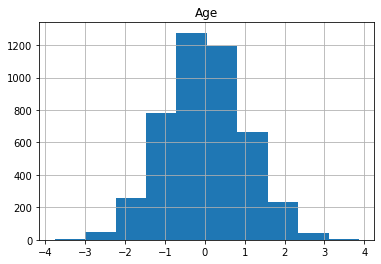

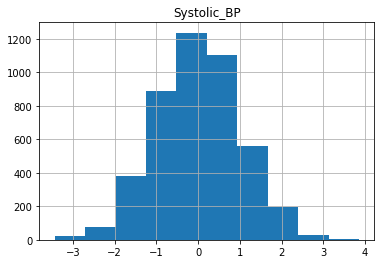

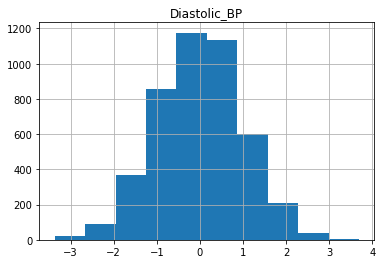

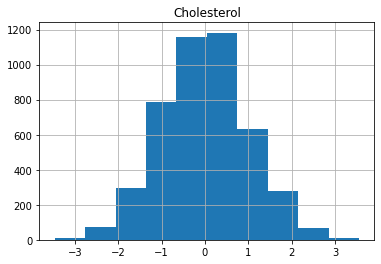

In [ ]:
for col in X_train.columns:
    X_train[col].hist()
    plt.title(col)
    plt.show()

<a name='1.3'></a>
### 1.3 Imputing Missing Values
- We will now use a more $\textbf{complexed medical dataset}$ with $\textbf{missing values}$

- Looking at the data in `X_train` below, some of the data is missing: some values in the output of the previous cell are marked as `NaN` ("not a number").

- Missing data is a common occurrence in data analysis, that can be due to a variety of reasons, such as measuring instrument malfunction, respondents not willing or not able to supply information, and errors in the data collection process.

- Let's examine the missing data pattern.

In [ ]:
import shap
import sklearn
import itertools
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image 

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

from util import load_data, cindex

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


In [ ]:
X_dev, X_test, y_dev, y_test = load_data(10)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=10)
print("X_train shape: {}".format(X_train.shape))
X_train.head()

X_train shape: (5147, 18)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
1599,43.0,84.0,637.0,1.0,49.3,10.0,5.0,253.0,134.0,1.59,7.7,1.0,NaN,490.0,27.3,9.1,25.803007,34.0
2794,72.0,96.0,154.0,2.0,43.4,23.0,4.3,265.0,106.0,1.66,6.8,2.0,208.0,301.0,35.2,6.0,33.394319,112.0
1182,54.0,78.0,205.0,1.0,43.8,12.0,4.2,206.0,180.0,1.67,6.6,2.0,NaN,363.0,49.6,5.9,20.278410,34.0
6915,59.0,90.0,417.0,1.0,43.4,9.0,4.5,327.0,114.0,1.65,7.6,2.0,NaN,347.0,32.9,6.1,32.917744,78.0
500,34.0,80.0,385.0,1.0,77.7,9.0,4.1,197.0,64.0,1.74,7.3,2.0,NaN,376.0,17.0,8.2,30.743489,30.0


Our $\textbf{targets}$ `y` will be whether or not the target died within **10 years**.

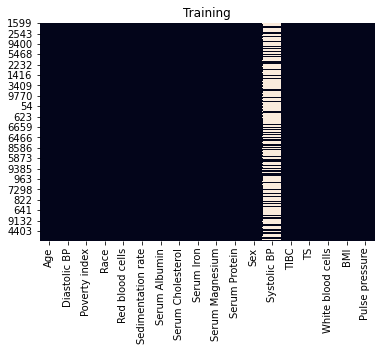

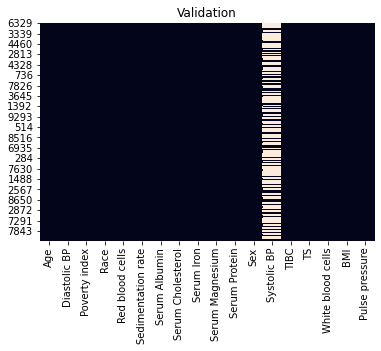

In [ ]:
sns.heatmap(X_train.isnull(), cbar=False)
plt.title("Training")
plt.show()

sns.heatmap(X_val.isnull(), cbar=False)
plt.title("Validation")
plt.show()

For each feature, represented as a column, values that are present are shown in black, and missing values are set in a light color.

From this plot, we can see that many values are missing for systolic blood pressure (`Systolic BP`).

In [ ]:
def fraction_rows_missing(df):
    '''
    Return percent of rows with any missing
    data in the dataframe. 
    
    Input:
        df (dataframe): a pandas dataframe with potentially missing data
    Output:
        frac_missing (float): fraction of rows with missing data
    '''
    return sum(df.isnull().any(axis=1))/len(df)

In [ ]:
print("\nComputed fraction missing: {}".format(fraction_rows_missing(X_dev)))
print(f"Fraction of rows missing from X_train: {fraction_rows_missing(X_train):.3f}")
print(f"Fraction of rows missing from X_val: {fraction_rows_missing(X_val):.3f}")
print(f"Fraction of rows missing from X_test: {fraction_rows_missing(X_test):.3f}")


Computed fraction missing: 0.699985429112633
Fraction of rows missing from X_train: 0.699
Fraction of rows missing from X_val: 0.704
Fraction of rows missing from X_test: 0.000


- We can see from the above results that the majority of the data is missing in each row
- We will now examine the distributions of the missing data

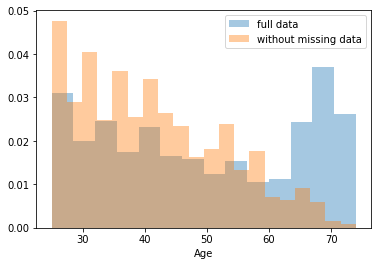

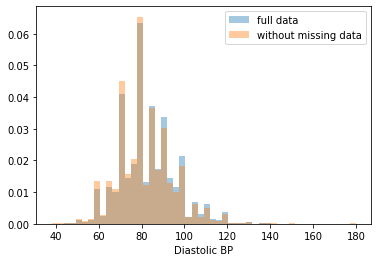

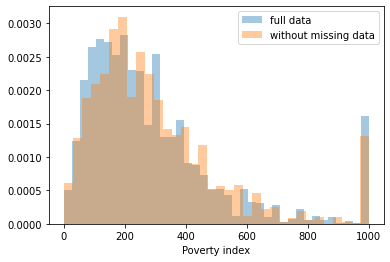

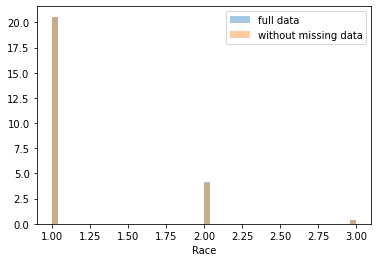

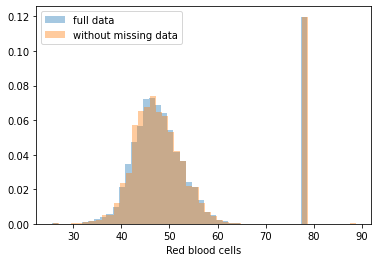

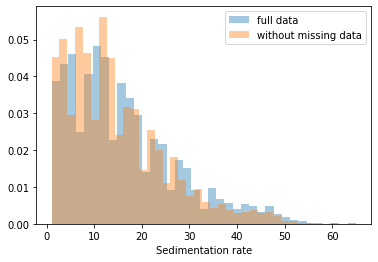

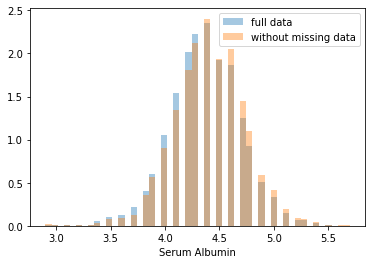

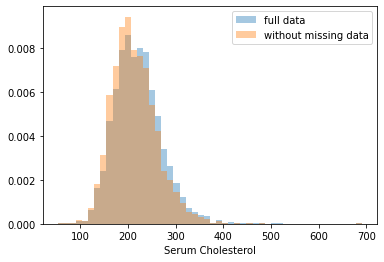

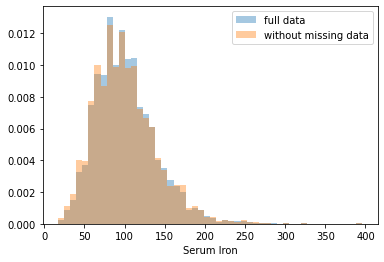

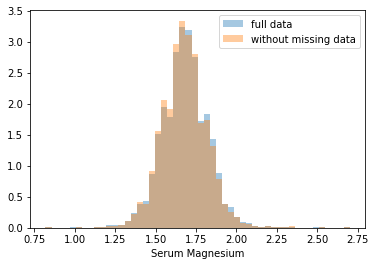

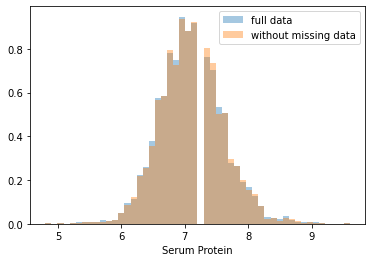

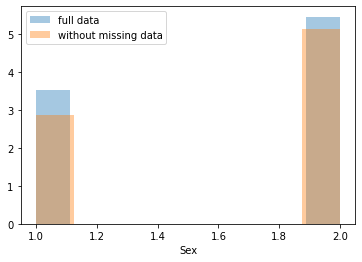

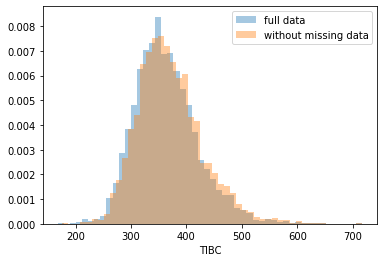

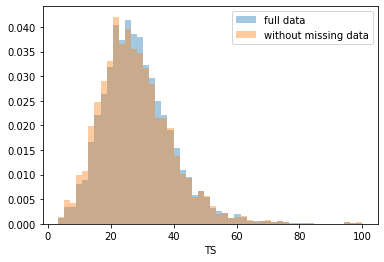

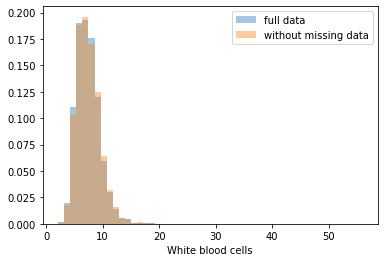

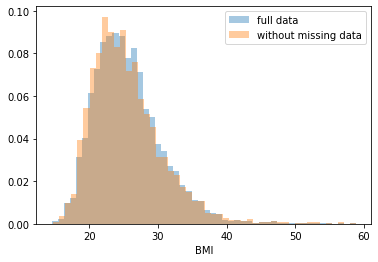

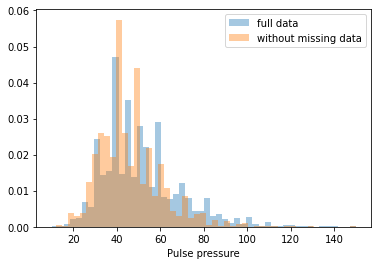

In [ ]:
dropped_rows = X_train[X_train.isnull().any(axis=1)]

columns_except_Systolic_BP = [col for col in X_train.columns if col not in ['Systolic BP']]

for col in columns_except_Systolic_BP:
    sns.distplot(X_train.loc[:, col], norm_hist=True, kde=False, label='full data')
    sns.distplot(dropped_rows.loc[:, col], norm_hist=True, kde=False, label='without missing data')
    plt.legend()

    plt.show()

- Most of the features are distributed similarly whether or not rows have been discarded with missing data. In other words missingness of the data is independent of these features.
<br>
<br>
- But when considering the age feature, much more data tends to be missing for patients over 65. The reason could be that blood pressure was measured less frequently for old people to avoid placing additional burden on them.

We will now perform a 2 step process where we build our AI model and evaluate it:
<br>
<br>
    - to dropped rows of missing data
    - using an imputer fill in the missing data and evaluate the difference in performance

<a name='2'></a>
## 2. Modelling from Explored Data
- The purpose of Modelling is to build predictive/Artificial Intelligence models using the current data that we have to train our model.
- The next phase is to use our trained model to make predictions on unseen data that we have not seen before.
- These predictions can then be used to provide advice to health specialists on a patients medical condition.
- In this section we will build a Decision Tree Model
- Next we will use an Ensemble of Decision Tree Models known as Ensemble Modelling
- We will evaluate our model on our missing data rows that have been dropped and compare the results of using an imputer for misssing data

First begin with a **complete case analysis**, dropping all of the rows with any missing data.

In [ ]:
X_train_dropped = X_train.dropna(axis='rows')
y_train_dropped = y_train.loc[X_train_dropped.index]
X_val_dropped = X_val.dropna(axis='rows')
y_val_dropped = y_val.loc[X_val_dropped.index]

<a name='2.1'></a>
### 2.1 Build the Model
The first model that we will use is a simple Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=None, random_state=10)
dt.fit(X_train_dropped, y_train_dropped)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

The model will be evaluated using a c-index metric which I have coded in the util file

In [ ]:
y_train_preds = dt.predict_proba(X_train_dropped)[:, 1]
print(f"Train C-Index: {cindex(y_train_dropped.values, y_train_preds)}")


y_val_preds = dt.predict_proba(X_val_dropped)[:, 1]
print(f"Val C-Index: {cindex(y_val_dropped.values, y_val_preds)}")

Train C-Index: 1.0
Val C-Index: 0.5629321808510638


Unfortunately the tree seems to be overfitting: it fits the training data so closely that it doesn't generalize well to other samples such as those from the validation set.

To handle this, some of the hyperparameters will be changed in the tree. 

In [ ]:
dt_hyperparams = {
    
    'max_depth':2,
    'min_samples_split': 2
    
}

In [ ]:
dt_reg = DecisionTreeClassifier(**dt_hyperparams, random_state=10)
dt_reg.fit(X_train_dropped, y_train_dropped)

y_train_preds = dt_reg.predict_proba(X_train_dropped)[:, 1]
y_val_preds = dt_reg.predict_proba(X_val_dropped)[:, 1]
print(f"Train C-Index: {cindex(y_train_dropped.values, y_train_preds)}")
print(f"Val C-Index (expected > 0.6): {cindex(y_val_dropped.values, y_val_preds)}")

Train C-Index: 0.6530603728090513
Val C-Index (expected > 0.6): 0.6068650265957447


We can now see that by adjusting our hyperparameters, we prevented our model from overfitting our data.

<a name='2.2'></a>
### 2.2 Ensemble Modelling
- One Model may not be good enough to fit our data 
- Ensemble Modelling involves creating multiple models and using these multiple models to fit our data.
- What are ensemble models good for ?
- Ensemble models are good for reducing variance(overfitting) in your model accuracy
- Additional information can be found here [Simple Guide for Ensemble Learning Methods](https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2)
- In the above model we have built a Decision Tree model. We will now build multiple Decision Tree models or an Ensemble of Decision Trees called a Random Forest.
- No matter how you choose hyperparameters, a single decision tree is prone to overfitting. So using random forests would be a better choice.

#### Create the Ensemble Model

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train_dropped, y_train_dropped)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

Now just like how we computed C-Index metric for the decision tree above, we will now evaluate the C-Index metric using our ensemble model which is a random forest on the training and validation set.

In [ ]:
y_train_rf_preds = rf.predict_proba(X_train_dropped)[:, 1]
print(f"Train C-Index: {cindex(y_train_dropped.values, y_train_rf_preds)}")

y_val_rf_preds = rf.predict_proba(X_val_dropped)[:, 1]
print(f"Val C-Index: {cindex(y_val_dropped.values, y_val_rf_preds)}")

Train C-Index: 1.0
Val C-Index: 0.6660488696808511


<a name='2.3'></a>
### 2.3 Hyperparameter Tuning

Training a random forest with the default hyperparameters results in a model that has better predictive performance than individual decision trees as in results displayed for decision trees, but this model is still overfitting.

Therefore it is necessary to tune (or optimize) the hyperparameters, to find a model that both has good predictive performance and minimizes overfitting.

The hyperparameters chosen to adjust for simplicity will be:

- `n_estimators`: the number of trees used in the forest.
- `max_depth`: the maximum depth of each tree.
- `min_samples_leaf`: the minimum number (if `int`) or proportion (if `float`) of samples in a leaf.

The approach implemented to tune the hyperparameters is known as a grid search:

- Define a set of possible values for each of the target hyperparameters.

- A model is trained and evaluated for every possible combination of hyperparameters.

- The best performing set of hyperparameters is returned.

Below is an implementation for a hyperparameter grid search, using the C-Index to evaluate each tested model.

In [ ]:
def holdout_grid_search(clf, X_train_hp, y_train_hp, X_val_hp, y_val_hp, hyperparams, fixed_hyperparams={}):
    '''
    Hyperparameter grid search on validation set.
    Hyperparameters are input as a dictionary mapping each hyperparameter name to the
    range of values to iterate over..

    Input:
        clf: sklearn classifier
        X_train_hp (dataframe): dataframe for training set input variables
        y_train_hp (dataframe): dataframe for training set targets
        X_val_hp (dataframe): dataframe for validation set input variables
        y_val_hp (dataframe): dataframe for validation set targets
        hyperparams (dict): hyperparameter dictionary mapping hyperparameter
                            names to range of values for grid search
        fixed_hyperparams (dict): dictionary of fixed hyperparameters that
                                  are not included in the grid search

    Output:
        best_estimator (sklearn classifier): fitted sklearn classifier with best performance on
                                             validation set
        best_hyperparams (dict): hyperparameter dictionary mapping hyperparameter
                                 names to values in best_estimator
    '''
    best_estimator = None
    best_hyperparams = {}
    
    # hold best running score
    best_score = 0.0

    # list of param values
    lists = hyperparams.values()
    
    # get all param combinations
    param_combinations = list(itertools.product(*lists))
    total_param_combinations = len(param_combinations)

    # iterate through param combinations
    for i, params in enumerate(param_combinations, 1):
        
        param_dict = {}
        for param_index, param_name in enumerate(hyperparams):
            param_dict[param_name] = params[param_index]
            
        # create estimator with specified params
        estimator = clf(**param_dict, **fixed_hyperparams)

        # fit estimator
        estimator.fit(X_train_hp, y_train_hp)
        
        # get predictions on validation set
        preds = estimator.predict_proba(X_val_hp)
        
        # compute cindex for predictions
        estimator_score = cindex(y_val_hp, preds[:,1])

        print(f'[{i}/{total_param_combinations}] {param_dict}')
        print(f'Val C-Index: {estimator_score}\n')

        # if new high score, update high score, best estimator
        # and best params 
        if estimator_score >= best_score:
                best_score = estimator_score
                best_estimator = estimator
                best_hyperparams = param_dict

    # add fixed hyperparamters to best combination of variable hyperparameters
    best_hyperparams.update(fixed_hyperparams)
    
    return best_estimator, best_hyperparams

Defining a range for Hyperparameters Below

In [ ]:
def random_forest_grid_search(X_train_dropped, y_train_dropped, X_val_dropped, y_val_dropped):

    # Define ranges for the chosen random forest hyperparameters 
    hyperparams = {

        # how many trees should be in the forest (int)
        'n_estimators': [100, 200, 300],

        # the maximum depth of trees in the forest (int)
        'max_depth': [i for i in range(1, 10)],
        
        # the minimum number of samples in a leaf
        'min_samples_leaf': [1],

    }

    
    fixed_hyperparams = {
        'random_state': 10,
    }
    
    rf = RandomForestClassifier

    best_rf, best_hyperparams = holdout_grid_search(rf, X_train_dropped, y_train_dropped,
                                                    X_val_dropped, y_val_dropped, hyperparams,
                                                    fixed_hyperparams)

    print(f"Best hyperparameters:\n{best_hyperparams}")

    
    y_train_best = best_rf.predict_proba(X_train_dropped)[:, 1]
    print(f"Train C-Index: {cindex(y_train_dropped, y_train_best)}")

    y_val_best = best_rf.predict_proba(X_val_dropped)[:, 1]
    print(f"Val C-Index: {cindex(y_val_dropped, y_val_best)}")
    
    # add fixed hyperparamters to best combination of variable hyperparameters
    best_hyperparams.update(fixed_hyperparams)
    
    return best_rf, best_hyperparams

In [ ]:
best_rf, best_hyperparams = random_forest_grid_search(X_train_dropped, y_train_dropped, X_val_dropped, y_val_dropped)

[1/27] {'n_estimators': 100, 'max_depth': 1, 'min_samples_leaf': 1}
Val C-Index: 0.6563248005319149

[2/27] {'n_estimators': 100, 'max_depth': 2, 'min_samples_leaf': 1}
Val C-Index: 0.6626662234042553

[3/27] {'n_estimators': 100, 'max_depth': 3, 'min_samples_leaf': 1}
Val C-Index: 0.6782579787234042

[4/27] {'n_estimators': 100, 'max_depth': 4, 'min_samples_leaf': 1}
Val C-Index: 0.668783244680851

[5/27] {'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 1}
Val C-Index: 0.6687666223404255

[6/27] {'n_estimators': 100, 'max_depth': 6, 'min_samples_leaf': 1}
Val C-Index: 0.6714594414893617

[7/27] {'n_estimators': 100, 'max_depth': 7, 'min_samples_leaf': 1}
Val C-Index: 0.6738530585106383

[8/27] {'n_estimators': 100, 'max_depth': 8, 'min_samples_leaf': 1}
Val C-Index: 0.6664394946808511

[9/27] {'n_estimators': 100, 'max_depth': 9, 'min_samples_leaf': 1}
Val C-Index: 0.6591090425531915

[10/27] {'n_estimators': 200, 'max_depth': 1, 'min_samples_leaf': 1}
Val C-Index: 0.66424534

- Now the model will be evaluated on the test set. This is a crucial step, as trying out many combinations of hyperparameters and evaluating them on the validation set could result in a model that ends up overfitting the validation set. 
- So there is a need to check if the model performs well on unseen data, which is the role of the test set, which has been held out until now.

In [ ]:
y_test_best = best_rf.predict_proba(X_test)[:, 1]

print(f"Test C-Index: {cindex(y_test.values, y_test_best)}")

Test C-Index: 0.7019872579216067


- The Test set is a decent model value which is better than all of the previous models build before
- In section [1.3](#1.3) I mentioned that we will evaluate our model on dropped rows of missing data and as well as use an Imputer to fill in this missing data and evaluate the performance.
- Let's now conduct this experiment

#### Imputer for missing values

In [ ]:
# Impute using regression on other features
imputer = IterativeImputer(random_state=0, sample_posterior=False, max_iter=1, min_value=0)
imputer.fit(X_train)
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

[IterativeImputer] Early stopping criterion not reached.


**The data will now be retrained using the same hyperparameter tuning that was done in the model building section, the only difference is that now the missing values have been replace using an Imputer instead of dropping the rows. Model performance will be evaluated on the missing data that has now been filled to see a comparison.**

In [ ]:
hyperparams = {

    # how many trees should be in the forest (int)
    'n_estimators': [i for i in range(100, 1000, 100)],

    # the maximum depth of trees in the forest (int)
    'max_depth': [j for j in range(1, 10)],

    # the minimum number of samples in a leaf
    'min_samples_leaf': [1],

}

In [ ]:
rf = RandomForestClassifier

rf_imputed, best_hyperparams_imputed = holdout_grid_search(rf, X_train_imputed, y_train,
                                                           X_val_imputed, y_val,
                                                           hyperparams, {'random_state': 10})

print("Performance for best hyperparameters:")

y_train_best = rf_imputed.predict_proba(X_train_imputed)[:, 1]
print(f"- Train C-Index: {cindex(y_train, y_train_best):.4f}")

y_val_best = rf_imputed.predict_proba(X_val_imputed)[:, 1]
print(f"- Val C-Index: {cindex(y_val, y_val_best):.4f}")

y_test_imp = rf_imputed.predict_proba(X_test)[:, 1]
print(f"- Test C-Index: {cindex(y_test, y_test_imp):.4f}")

[1/81] {'n_estimators': 100, 'max_depth': 1, 'min_samples_leaf': 1}
Val C-Index: 0.7125889446930662

[2/81] {'n_estimators': 100, 'max_depth': 2, 'min_samples_leaf': 1}
Val C-Index: 0.7288177548481236

[3/81] {'n_estimators': 100, 'max_depth': 3, 'min_samples_leaf': 1}
Val C-Index: 0.7331854631203872

[4/81] {'n_estimators': 100, 'max_depth': 4, 'min_samples_leaf': 1}
Val C-Index: 0.7404942903858305

[5/81] {'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 1}
Val C-Index: 0.7449998805747179

[6/81] {'n_estimators': 100, 'max_depth': 6, 'min_samples_leaf': 1}
Val C-Index: 0.7500168281079344

[7/81] {'n_estimators': 100, 'max_depth': 7, 'min_samples_leaf': 1}
Val C-Index: 0.7466512065210547

[8/81] {'n_estimators': 100, 'max_depth': 8, 'min_samples_leaf': 1}
Val C-Index: 0.7485554969285989

[9/81] {'n_estimators': 100, 'max_depth': 9, 'min_samples_leaf': 1}
Val C-Index: 0.751981916840919

[10/81] {'n_estimators': 200, 'max_depth': 1, 'min_samples_leaf': 1}
Val C-Index: 0.72064580

In [ ]:
def bad_subset(forest, X_test, y_test):
    # define mask to select large subset with poor performance
    # currently mask defines the entire set
    
    mask = X_test['Age'] > 65

    X_subgroup = X_test[mask]
    y_subgroup = y_test[mask]
    subgroup_size = len(X_subgroup)

    y_subgroup_preds = forest.predict_proba(X_subgroup)[:, 1]
    performance = cindex(y_subgroup.values, y_subgroup_preds)
    
    return performance, subgroup_size

In [ ]:
performance, subgroup_size = bad_subset(best_rf, X_test, y_test)
print(f"C-Index (no imputation): {performance}")

performance, subgroup_size = bad_subset(rf_imputed, X_test, y_test)
print(f"C-Index (multivariate feature imputation): {performance}")

C-Index (no imputation): 0.6844635627530364
C-Index (multivariate feature imputation): 0.700763326585695


- According to the results above we can now see the result of [section 1.3](#1.3) where the rows with missing data was dropped
- The result where we filled in the missing values using an Imputer has a better performance on the test set

<a name='2.4'></a>
### 2.4 Feature Importance using SHAP
- Why would we care about feature importance ? Surely our predictions from our model would be enough to determine what decisions should me made next.
- This is false. The perception of just using a models predictions to make decisions could cost people their lives.
- If we take the medical field for example, using a models prediction for a patients risk score to determine what treatment a patient will receive could kill the patient if it is just based on their risk score.
- If we take another example such as the insurance industry, based on a persons risk profile if we issue products just based on the models predictions of a persons risk profile, we could end up issuing the wrong customer products, which could later down the line impact the company as having a bad reputation.
<br>
<br>
- The purpose of feature importance is to understand which features have an effect on the models overall performance.
- In this notebook a model was created to evaluate a patients risk score of dying within 10 years, but by understanding which features contribute to driving up the risk score such as age, sex, etc. a doctor will then be able to determine that maybe the age factor is driving up a patients risk score and will thus be able to prescribe the recommended treatment.
<br>
<br>
- In this section I will try to explain the predictions using a slightly more sophisticated technique using $\textbf{SHAP (SHapley Additive exPlanations), a cutting edge method that explains predictions made by black-box machine learning models }$
<br>
<br>
Given a prediction made by a machine learning model, SHAP values explain the prediction by quantifying the additive importance of each feature to the prediction. SHAP values have their roots in cooperative game theory, where Shapley values are used to quantify the contribution of each player to the game.
<br>
<br>
Although it is computationally expensive to compute SHAP values for general black-box models, in the case of trees and forests there exists a fast polynomial-time algorithm. For more details, see the: 
- [TreeShap paper](https://arxiv.org/pdf/1802.03888.pdf) 

Let's now use the [shap library](https://github.com/slundberg/shap) to do this for our random forest model. The code below will output the most at risk individuals in the test set according to our model using a force plot.

In [ ]:
X_test_risk = X_test.copy(deep=True)
X_test_risk.loc[:, 'risk'] = rf_imputed.predict_proba(X_test_risk)[:, 1]
X_test_risk = X_test_risk.sort_values(by='risk', ascending=False)
X_test_risk.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,risk
6337,69.0,80.0,233.0,1.0,77.7,48.0,4.2,159.0,87.0,1.81,6.9,1.0,146.0,291.0,29.9,15.2,17.931276,66.0,0.684155
2400,70.0,80.0,312.0,1.0,54.8,7.0,4.4,222.0,52.0,1.57,7.2,1.0,180.0,417.0,12.5,7.5,45.770473,100.0,0.649988
5493,67.0,80.0,30.0,1.0,77.7,59.0,3.4,231.0,36.0,1.40,6.3,1.0,170.0,202.0,17.8,8.4,17.029470,90.0,0.648321
864,74.0,110.0,105.0,1.0,46.9,45.0,4.4,233.0,102.0,1.70,7.3,1.0,180.0,283.0,36.0,9.2,26.906341,70.0,0.613028
2044,74.0,80.0,83.0,1.0,47.6,19.0,4.2,205.0,72.0,1.71,6.9,1.0,180.0,310.0,23.2,10.8,20.900101,100.0,0.606868


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


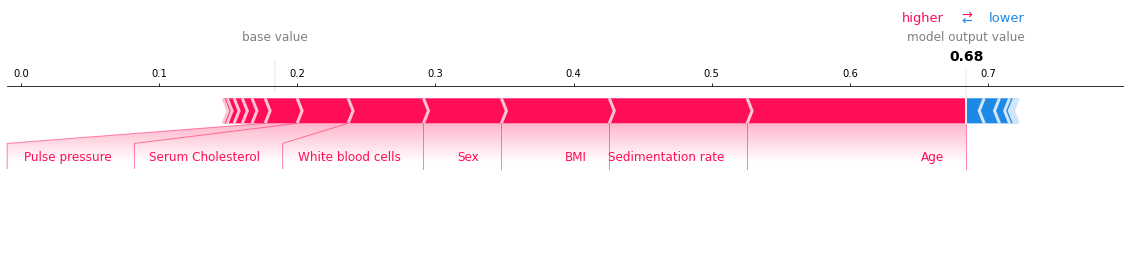

In [ ]:
explainer = shap.TreeExplainer(rf_imputed)
i = 0
shap_value = explainer.shap_values(X_test.loc[X_test_risk.index[i], :])[1]
shap.force_plot(explainer.expected_value[1], shap_value, feature_names=X_test.columns, matplotlib=True)

#### Reading the force Plot

- The red sections on the left are features which push the model towards the final prediction in the positive direction (i.e. a higher Age increases the predicted risk).
- The blue sections on the right are features that push the model towards the final prediction in the negative direction (if an increase in a feature leads to a lower risk, it will be shown in blue).
- Note that the exact output of the chart will differ depending on the hyper-parameters that I chose for this model.
- It is also possible to aggregate the models output and then use SHAP values to understand this.

In [ ]:
shap_values = shap.TreeExplainer(rf_imputed).shap_values(X_test)[1]

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


The colors indicate the value of the feature.

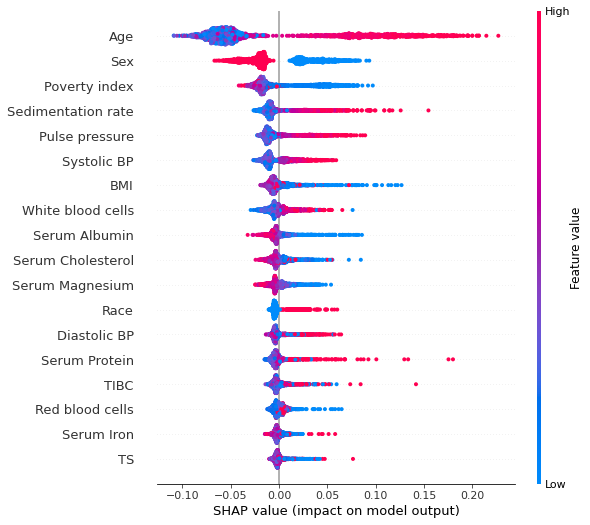

In [ ]:
shap.summary_plot(shap_values, X_test)

Clearly it is seen that being a woman (`sex = 2.0`, as opposed to men for which `sex = 1.0`) has a negative SHAP value, meaning that it reduces the risk of dying within 10 years. High age and high systolic blood pressure have positive SHAP values, and are therefore related to increased mortality. 

You can see how features interact using dependence plots. These plot the SHAP value for a given feature for each data point, and color the points in using the value for another feature. This lets us begin to explain the variation in SHAP value for a single value of the main feature.

Let's now see the interaction between Age and Sex.

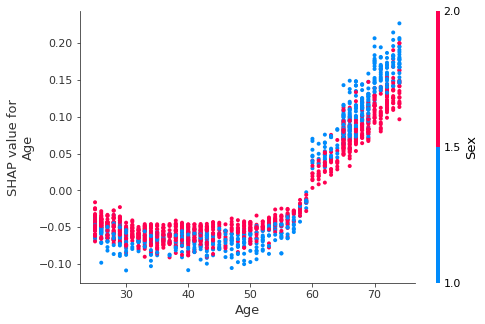

In [ ]:
shap.dependence_plot('Age', shap_values, X_test, interaction_index='Sex')

It is seen that while Age > 50 is generally bad (positive SHAP value), being a woman generally reduces the impact of age. This makes sense since we know that women generally live longer than men.

Let's now look at poverty index and age.

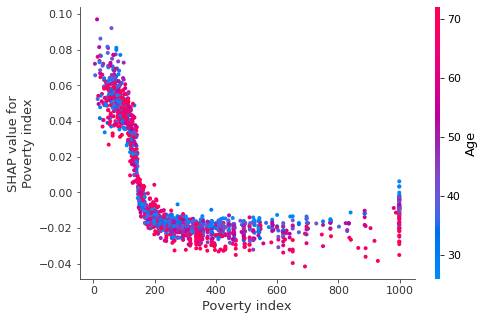

In [ ]:
shap.dependence_plot('Poverty index', shap_values, X_test, interaction_index='Age')

It is seen that the impact of poverty index drops off quickly, and for higher income individuals age begins to explain much of variation in the impact of poverty index.

<a name='3'></a>
## 3. Conclusion
- This is a notebook to get Data Scientists started and covers all of the necessary techniques 
- However due to my time constraints I could not include everything that I wanted to include
- So instead I have attached my unstructured notes on these topics in the github repository provided.
- This is located in the "Raw" folder in my github repository.
<br>
<br>
- For future use the following content will be added:
    - Evaluating Model Performance with Multiple Metrics(TP, TN, FP, FN, Precision, Recall, F1 Score, AUC, ROC)
    - Scaling our Models to Production in Google Cloud Platform
    - Advanced Statistics such as Gaussian Processes, Multivariate Distributions, Likelihood, Out-of-Distribution models, etc.